## Analysis of the dialogs in L'Avare of Molière


In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd

## Treatment of the dialogs

In [2]:
#Remove pontuation so it does not count as a word
def remove_grammar_pontuation(line):
    pontuation = [',','.', ':', ';', '?', '!', '\n']
    for p in pontuation:
        line = line.replace(p, ' ')
    return line

In [3]:
#Read file and get list of characters and list of dialog lines
lines = []
characters = []
with open('moliere_avare.txt', 'r', encoding='utf-8') as avare:
    file_lines = avare.readlines()
    
    #Get list of characters
    for line in file_lines[19:33]:
        characters.append(line.split(',')[0].split('–')[1].strip().upper())
    
    #Get list of dialog lines
    for line in file_lines[40:]:
        if line != '\n':
            lines.append(remove_grammar_pontuation(line))

### Create a dict of lines for each character of each scene of each act
This dict has the form 
{
    Acte 1: {
        Scene 1: {
            Character 1 : [Line1, Line2, ...],
            Character 2 : [Line1, Line2, ...],
            ...
        }, ...
    }, ...
}

In [4]:
speech_dict = {}
i = 0
while i < len(lines):
    #Get the current act
    if lines[i].startswith('## '):
        acte = lines[i].split()[2].strip()
        speech_dict[acte] = {}
    
    #Get the current scene
    elif lines[i].startswith('###'):
        scene = lines[i].split()[2].strip()
        speech_dict[acte][scene] = {}

        #After some file lines that indicates the scene, there is a line indicating
        #the characters in the scene, so we skip that line
        if not lines[i+1].startswith('    '):
            i+=1
    
    #Get the character that will speak the next line
    elif lines[i].startswith('    '):
        character = lines[i].split('*')[0].strip().replace('Î', 'I')
        if character not in speech_dict[acte][scene].keys():
            speech_dict[acte][scene][character] = []

    #Get the line and append to the list of lines for a character
    else:
        speech_dict[acte][scene][character].append(lines[i].replace('< Fin >', '').strip())
        
    i += 1


## 1. Classification of Characters by Scenes, Lines and Words

#### Number of Scenes by Character

In [5]:
scenes_by_character = {}

for act in speech_dict.keys():
    for scene in speech_dict[act].keys():
        for character in speech_dict[act][scene].keys():
            if character not in scenes_by_character.keys():
                scenes_by_character[character] = 0
            scenes_by_character[character] += 1

#### Number of Lines by Character

In [6]:
lines_by_character = {}

for act in speech_dict.keys():
    for scene in speech_dict[act].keys():
        for character in speech_dict[act][scene].keys():
            if character not in lines_by_character.keys():
                lines_by_character[character] = 0
            lines_by_character[character] += len(speech_dict[act][scene][character])

#### Number of Words by Character

In [7]:
words_by_character = {}

for act in speech_dict.keys():
    for scene in speech_dict[act].keys():
        for character in speech_dict[act][scene].keys():
            if character not in words_by_character.keys():
                words_by_character[character] = 0
            for speech in speech_dict[act][scene][character]:
                words_by_character[character] += len(speech.split())

### DataFrame with infos for scenes, lines and words

In [8]:
avare_df = pd.DataFrame(data={'Character' : words_by_character.keys(), 'Scenes' : scenes_by_character.values(),
                   'Lines' : lines_by_character.values(), 'Words' : words_by_character.values()})
avare_df

,Character,Scenes,Lines,Words
0,VALÈRE,9,106,2552
1,ÉLISE,9,52,996
2,CLÉANTE,14,163,3078
3,HARPAGON,23,376,5655
4,LA FLÈCHE,5,66,1393
5,MAITRE SIMON,1,5,179
6,FROSINE,10,69,2173
7,MAITRE JACQUES,9,93,1556
8,LA MERLUCHE,2,6,49
9,BRINDAVOINE,2,3,38


### Graphs

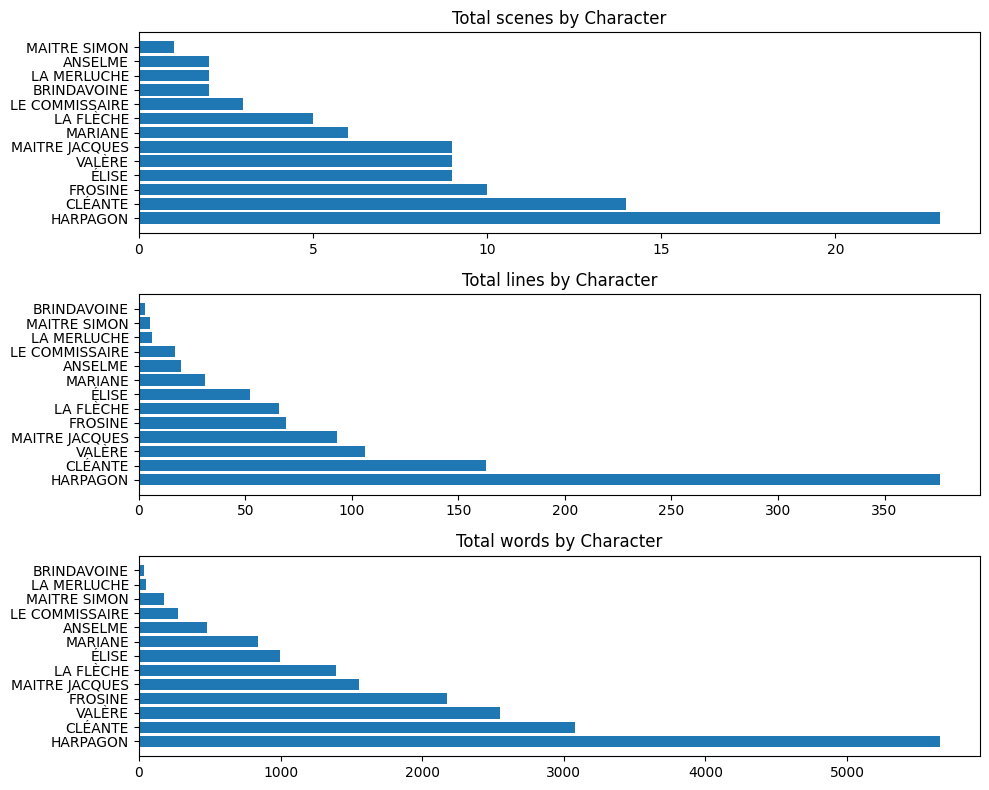

In [9]:
fig, ax = plt.subplots(3,1, figsize=(10,8))

scene_df = avare_df[avare_df['Scenes'] > 0].sort_values(by=['Scenes'], ascending=False)
ax[0].barh(y=scene_df['Character'].to_list(), width=scene_df['Scenes'].to_list())
ax[0].set_title('Total scenes by Character')

line_df = avare_df[avare_df['Lines'] > 0].sort_values(by=['Lines'], ascending=False)
ax[1].barh(y=line_df['Character'].to_list(), width=line_df['Lines'].to_list())
ax[1].set_title('Total lines by Character')

word_df = avare_df[avare_df['Words'] > 0].sort_values(by=['Words'], ascending=False)
ax[2].barh(y=word_df['Character'].to_list(), width=word_df['Words'].to_list())
ax[2].set_title('Total words by Character')

fig.tight_layout()
plt.show();


### Character(s) with no lines

In [13]:
for character in characters:
    if character not in avare_df['Character'].to_list():
        print(character)

DAME CLAUDE


### Conclusion:

We can conclude that Harpagon is the character that speaks the most and Dame Claude is the one that does not speak at all.

## 2. Number of words spoken by character in each scene

### Create dict for counting the number of words

In [ ]:
words_by_char_and_scene = {}

for act in speech_dict.keys():
    for scene in speech_dict[act].keys():
        if (act, scene) not in words_by_char_and_scene.keys():
            words_by_char_and_scene[(act, scene)] = {}
        for character in speech_dict[act][scene].keys():
            count_words = 0
            for line in speech_dict[act][scene][character]:
                count_words += len(line.split())
            words_by_char_and_scene[(act, scene)][character] = count_words

### Interactive Graph

This graph allows to select the act and the scene, then presents a pie graph with the percentage of words spoken by each character in that scene.

In [15]:
def plot_graph(act, scene):
    _, ax = plt.subplots(figsize=(5,4))

    labels = words_by_char_and_scene[(act,scene)].keys()
    words = words_by_char_and_scene[(act,scene)].values()

    ax.pie(words, labels=labels, autopct='%1.1f%%')
    ax.set_title("Words by Character")
    plt.show()
    

dropdown_act = widgets.Dropdown(
    options=speech_dict.keys(),
    description="Act:"
)

dropdown_scene = widgets.Dropdown(
    options=speech_dict[dropdown_act.value].keys(),
    description="Scene:"
)

widgets.interactive(plot_graph, act=dropdown_act, scene=dropdown_scene)

interactive(children=(Dropdown(description='Act:', options=('Premier', 'II', 'III', 'IV', 'V'), value='Premier…